# Top Indicators for House Price

#### Introduction:
There is a open dataset available for House Price Prediction (Ames, Iowa). We will perform the following on the data set:
Perform a Exploratory Data Analysis
Feature Engineering
Create Models to predict the house price.

Along, with this we will identify the key features which would help the Seller or Real Estate Agent to increase the value of a house by making improvements to particlar section of property. 
If we mention that the price of property would increase if the overall quality is excellent, then it would be very broad scoped. If the seller wants to spend $50,000 on home improvement to get a better selling price, then which are the areas that he should concentrate upon to have a better chance of increasing the selling price. Ex: Should the seller add a fireplace, or add new appliances to kitchen etc.
We will let the model give us the feature list which would provide data to seller for making informed decisions prior to selling the property.

In [1]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
%matplotlib inline

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Model
from sklearn.model_selection import KFold, cross_val_score, ShuffleSplit, train_test_split
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error
import xgboost
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder,PowerTransformer
from catboost import Pool

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
warnings.filterwarnings('ignore')


In [2]:
# Load the Data
df_train = pd.read_csv('./Data/train.csv')

### EDA

In [3]:
# EDA
# Sample the data
print("Shape of Data", df_train.shape)
# settings to display all columns
pd.set_option("display.max_columns", None)
df_train.head()

Shape of Data (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Check if there are any year sold entries earlier than yearbuilt
df_train.loc[df_train['YrSold'] < df_train['YearBuilt'],'YrSold' ]

Series([], Name: YrSold, dtype: int64)

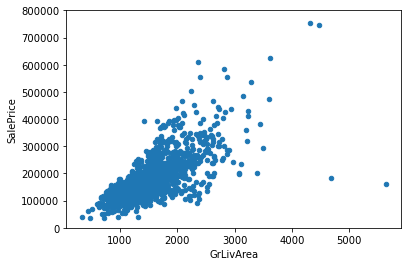

In [5]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

###### The Living Area to SalesPrice appears to be Lineary, except for few outliers

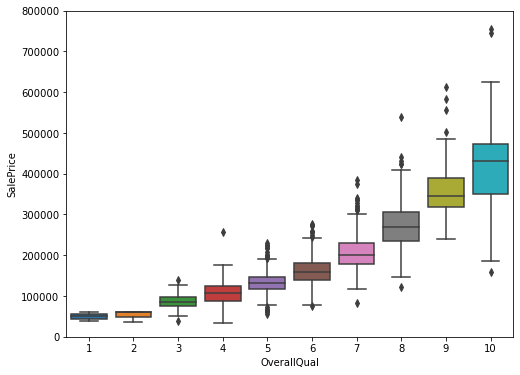

In [6]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

###### The quality is highly correlated to Sales Price

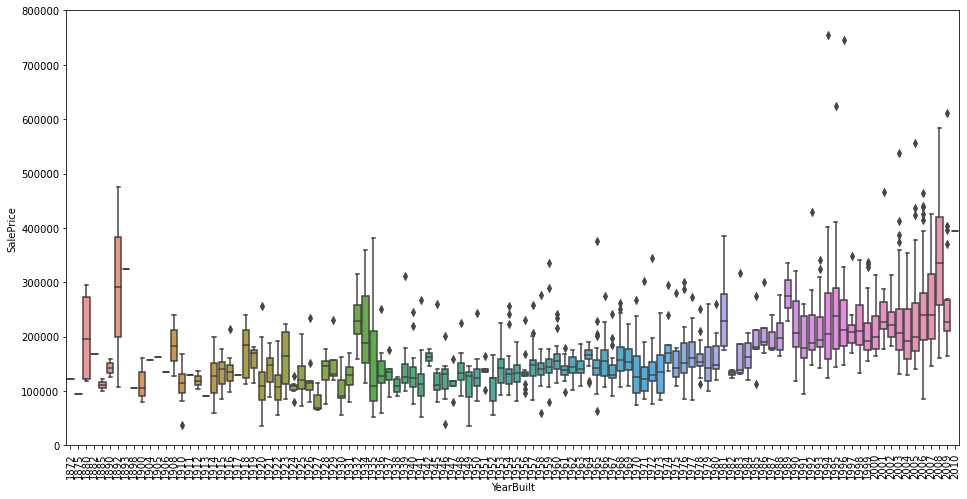

In [7]:
# box plot for yearbuilt
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

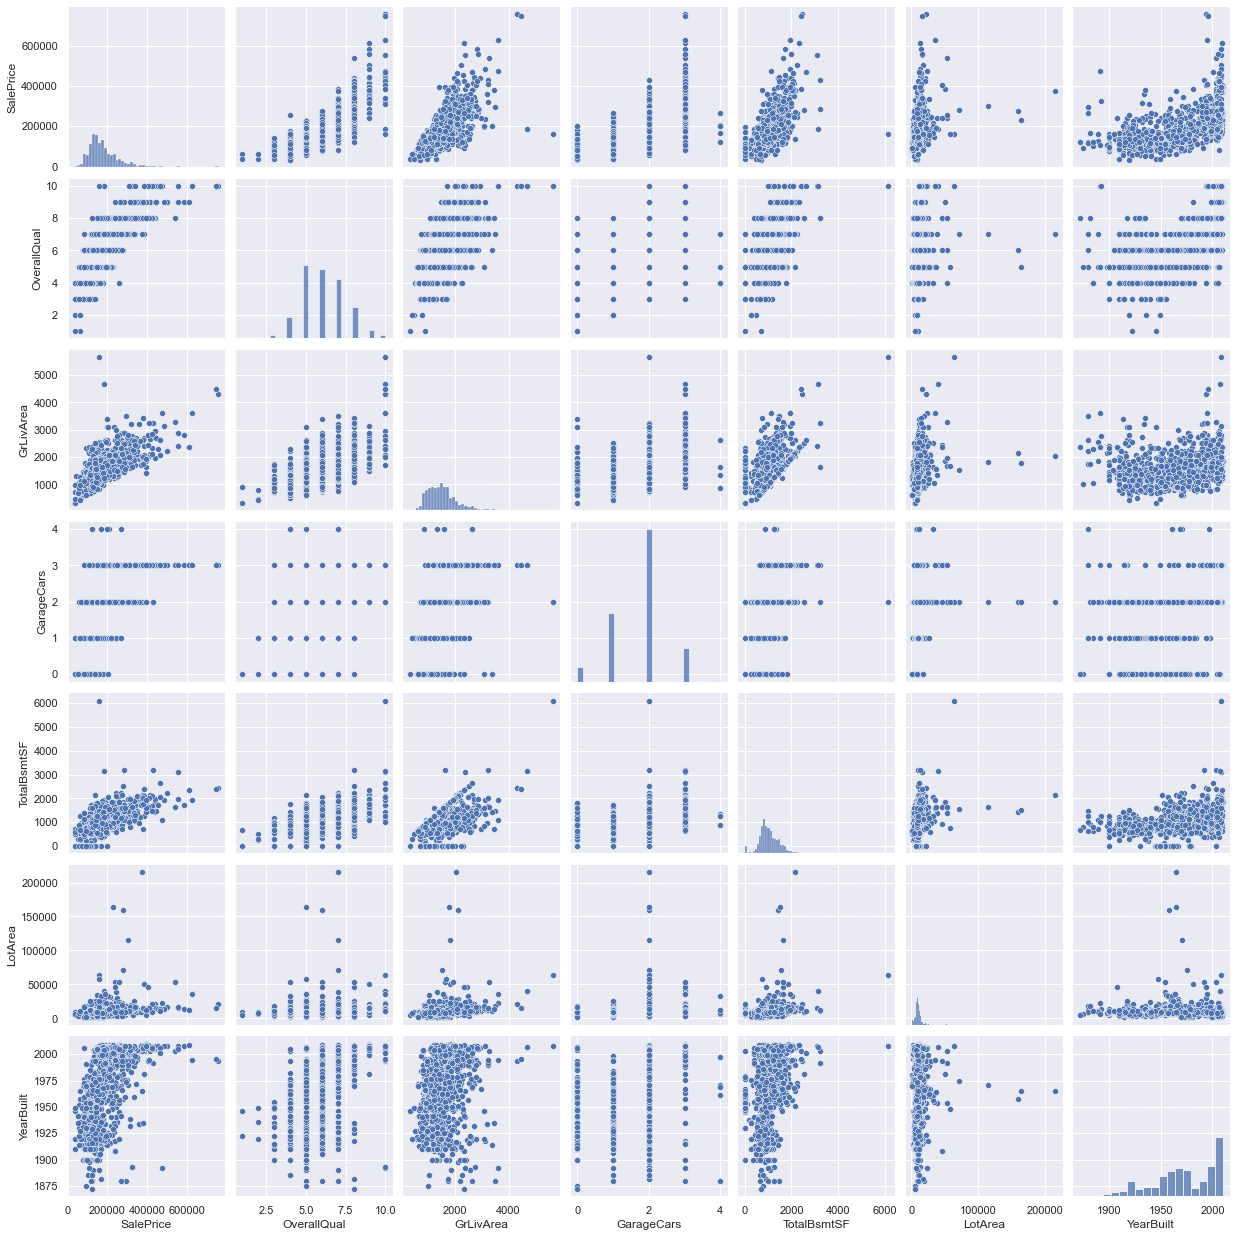

In [8]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'LotArea', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

<AxesSubplot:>

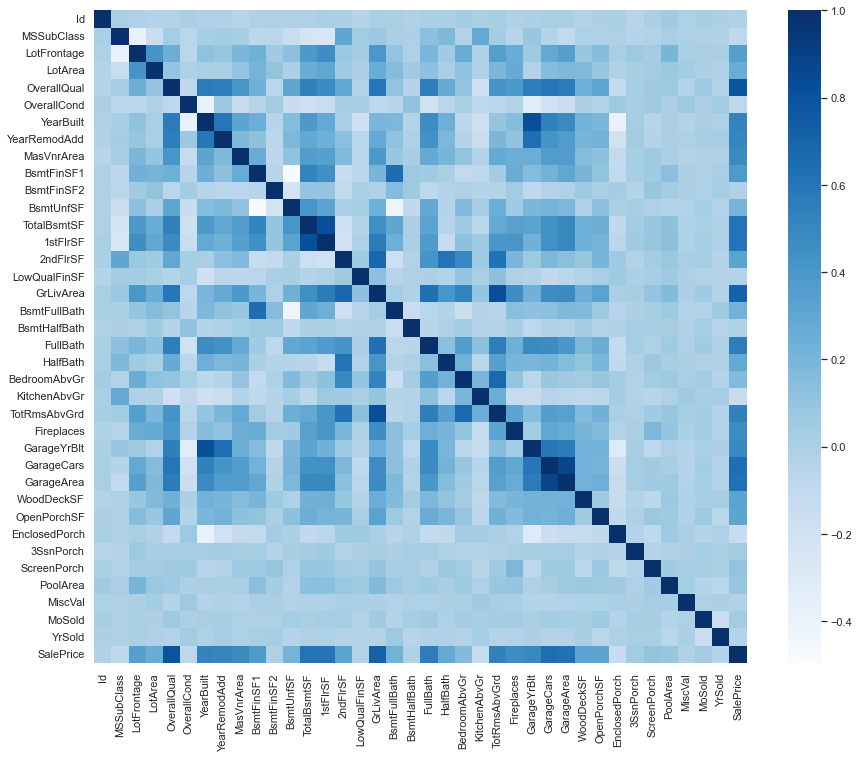

In [9]:
##create a correlation matrix for the variables of df_train with eachother 
corr = df_train.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, cmap="Blues", square=True)

In [10]:
# Showing the top 10 Correlated features with saleprice, excluding having the correlations of the variables with themselves
correlation_train=df_train.corr()

corr_dict=correlation_train['SalePrice'].sort_values(ascending=False).to_dict()
important_columns=[]
for key,value in corr_dict.items():
    if ((value>0.1) & (value<1)) | (value<=-0.1):
        important_columns.append(key)
important_columns[:10] ##this is still in descending order but the negative correlations minimize out at ~ -0.1 which is lower than the top 10 in the positive direction

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']

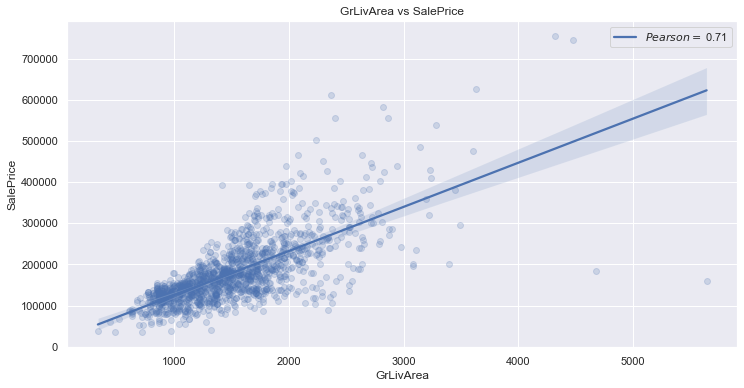

In [11]:
# GrLivArea vs SalePrice [corr = 0.71]
##showing correlation and scatter plot of grlivarea vs saleprice
Pearson_GrLiv = 0.71
plt.figure(figsize = (12,6))
sns.regplot(data=df_train, x = 'GrLivArea', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('GrLivArea vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_GrLiv)], loc = 'best')
plt.show()

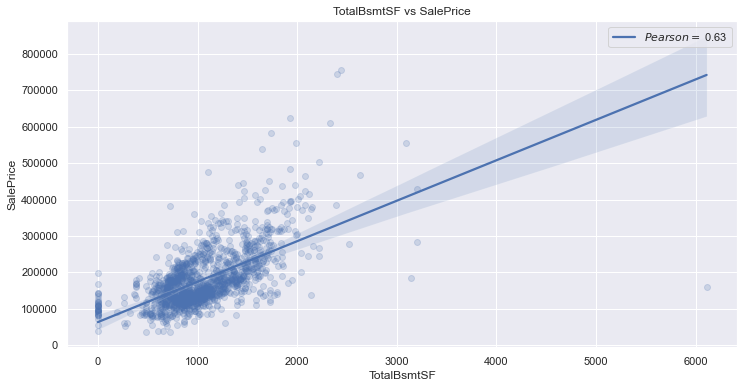

In [12]:
##showing correlation and scatter plot of total basement squarefootage vs saleprice
Pearson_TBSF = 0.63
plt.figure(figsize = (12,6))
sns.regplot(data=df_train, x = 'TotalBsmtSF', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('TotalBsmtSF vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_TBSF)], loc = 'best')
plt.show()

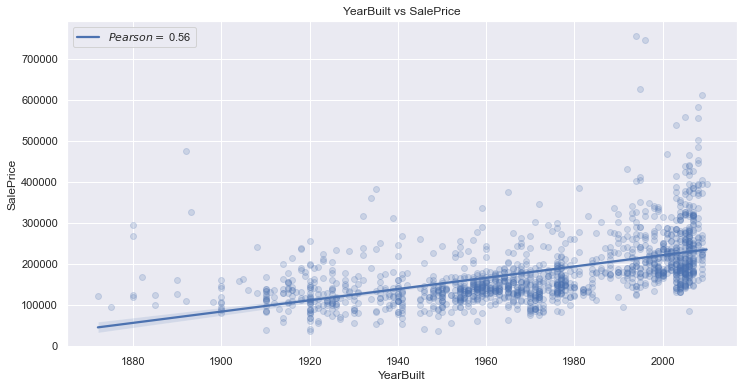

In [13]:
# YearBuilt vs SalePrice

Pearson_YrBlt = 0.56
plt.figure(figsize = (12,6))
sns.regplot(data=df_train, x = 'YearBuilt', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('YearBuilt vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_YrBlt)], loc = 'best')
plt.show()

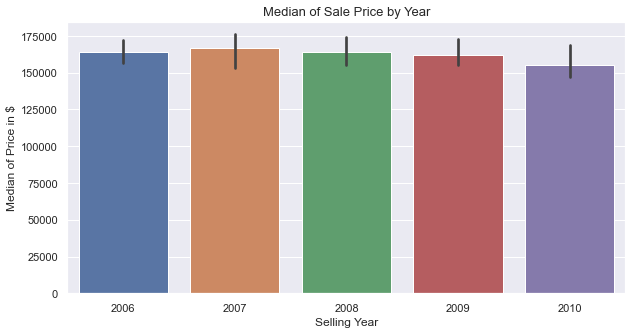

In [14]:
# Median of Sale Price by Year

plt.figure(figsize = (10,5))
sns.barplot(x='YrSold', y="SalePrice", data = df_train, estimator = np.median)
plt.title('Median of Sale Price by Year', fontsize = 13)
plt.xlabel('Selling Year', fontsize = 12)
plt.ylabel('Median of Price in $', fontsize = 12)
plt.show()

### Feature Engineering

##### Analyzing the Predictor variable. SalePrice

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

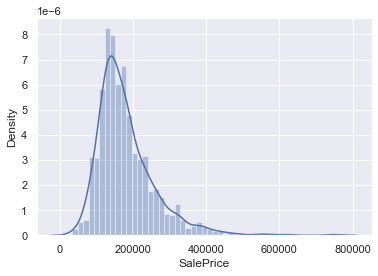

In [15]:
%%capture --no-display
# Checking the outcome variable
sns.distplot(df_train['SalePrice'])


We notice that the data is skewed to the right. With very large outliers but the majority of the data on the lower end, we will apply a logarithmic transformation to the data to normalize and make results more interpretable. 

In [16]:
print(df_train['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64



 mu = 12.02 and sigma = 0.40



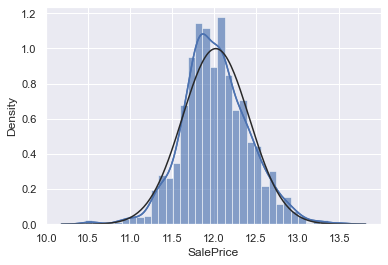

In [17]:
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])
# replot the graph
sns.distplot(df_train['SalePrice'])

#Check the new distribution, compare the distribution to a normal distribution
sns.distplot(df_train['SalePrice'] , fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


We notice that the graph is close to normal distribution after the log transformation.

### Cleanup NAN values

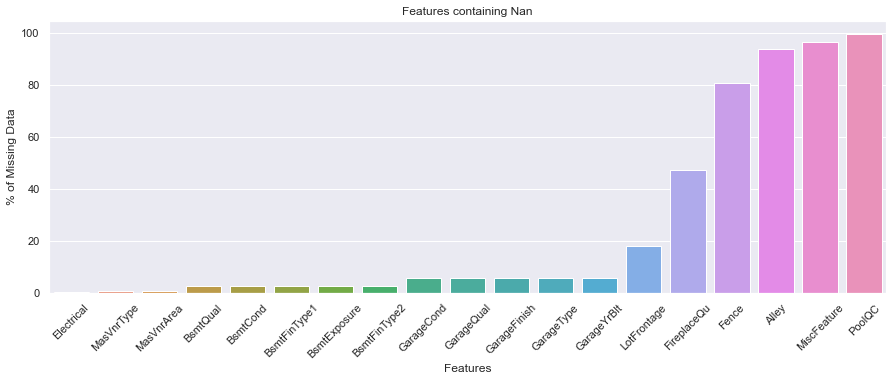

In [18]:
# Looking at NaN % within the data

nan = pd.DataFrame(df_train.isna().sum(), columns = ['NaN_sum']) ##create a dataframe with a summation of the nan values per column
nan['feat'] = nan.index
nan['Perc(%)'] = (nan['NaN_sum']/1460)*100 ##calculate the percentage out of total observations
nan = nan[nan['NaN_sum'] > 0] ##pull out only the variables that have NA values
nan = nan.sort_values(by = ['NaN_sum']) ##sort by the total amount of NA values
nan['Usability'] = np.where(nan['Perc(%)'] > 20, 'Discard', 'Keep') ##flag columns that have higher than 20% nan values to discard for not being usable
nan

# Plotting Nan
plt.figure(figsize = (15,5)) 
sns.barplot(x = nan['feat'], y = nan['Perc(%)'])
plt.xticks(rotation=45)
plt.title('Features containing Nan')
plt.xlabel('Features')
plt.ylabel('% of Missing Data')
plt.show()

In [19]:
# Provides column name, rows having nan and percentage for nan values
def nan_check():
    data = pd.DataFrame(df_train)
    df_cols = list(pd.DataFrame(data))
    print("Total Columns in dataframe", len(df_cols))
    print("The columns which have NAN values")
    for i in range(len(df_cols)):
        if data[df_cols[i]].isnull().sum() != 0:
            print(df_cols[i], data[df_cols[i]].isnull().sum(), round(((data[df_cols[i]].isnull().sum())*100)/1460,2))
nan_check()

Total Columns in dataframe 81
The columns which have NAN values
LotFrontage 259 17.74
Alley 1369 93.77
MasVnrType 8 0.55
MasVnrArea 8 0.55
BsmtQual 37 2.53
BsmtCond 37 2.53
BsmtExposure 38 2.6
BsmtFinType1 37 2.53
BsmtFinType2 38 2.6
Electrical 1 0.07
FireplaceQu 690 47.26
GarageType 81 5.55
GarageYrBlt 81 5.55
GarageFinish 81 5.55
GarageQual 81 5.55
GarageCond 81 5.55
PoolQC 1453 99.52
Fence 1179 80.75
MiscFeature 1406 96.3


In [20]:
# Seperate Numerical and Non-Numerical Columns for analysis
object_columns_df = df_train.select_dtypes(include=['object'])
numerical_columns_df =df_train.select_dtypes(exclude=['object'])

In [21]:
# Let's clean the categorical variables which have NAN value
def nan_check_cat():
    """
        Get the list of columns which have NAN values for Categorical data
    """
    data = pd.DataFrame(object_columns_df)
    df_cols = list(pd.DataFrame(data))
    print(len(df_cols))
    for i in range(len(df_cols)):
        if data[df_cols[i]].isnull().sum() != 0:
            print(df_cols[i], data[df_cols[i]].isnull().sum(), round(((data[df_cols[i]].isnull().sum())*100)/1460,2))
nan_check_cat()

43
Alley 1369 93.77
MasVnrType 8 0.55
BsmtQual 37 2.53
BsmtCond 37 2.53
BsmtExposure 38 2.6
BsmtFinType1 37 2.53
BsmtFinType2 38 2.6
Electrical 1 0.07
FireplaceQu 690 47.26
GarageType 81 5.55
GarageFinish 81 5.55
GarageQual 81 5.55
GarageCond 81 5.55
PoolQC 1453 99.52
Fence 1179 80.75
MiscFeature 1406 96.3


In [22]:
## Dropping columns which have greater than 40% of missing data. Also, dropping the Id column as it is not required
df_train.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

In [23]:
# update the values to NA for NAN value. These columns by default have NA in the specification document
columns_NA = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond']
#object_columns_df[columns_NA]= object_columns_df[columns_NA].fillna('NA')
df_train[columns_NA]= df_train[columns_NA].fillna('NA')
# update the values to None. The value of None is as per specification of document
columns_None = ['MasVnrType']
df_train[columns_None]= df_train[columns_None].fillna('None')
# update the values to the Mode value
columns_Mode = ['Electrical']
#object_columns_df[columns_Mode] = object_columns_df[columns_Mode].fillna(object_columns_df.mode().iloc[0])
df_train[columns_Mode] = df_train[columns_Mode].fillna(df_train.mode().iloc[0])

In [24]:
# Sanity to validate if there are any more categorical values having NAN
object_columns_df = df_train.select_dtypes(include=['object'])
nan_check_cat()

38


There are no more NAN values for non numerical column.

We will cleanup data for numerical columns.

In [25]:
numerical_columns_df =df_train.select_dtypes(exclude=['object'])
def nan_check_num():
    """
        Get the list of columns which have NAN values for Categorical data
    """
    data = pd.DataFrame(numerical_columns_df)
    df_cols = list(pd.DataFrame(data))
    #print(len(df_cols))
    for i in range(len(df_cols)):
        if data[df_cols[i]].isnull().sum() != 0:
            print(df_cols[i], data[df_cols[i]].isnull().sum(), round(((data[df_cols[i]].isnull().sum())*100)/1460,2))
nan_check_num()

LotFrontage 259 17.74
MasVnrArea 8 0.55
GarageYrBlt 81 5.55


In [26]:
# Fill the MasVnrArea as 0 for missing value, as it would be NA if there isn't a mason veneer
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)
# Update Garage YrBlt as the buildings build year for NA value, as we anticipate a newer garage to have positive power on price, so setting a house without a garage to have the oldest garage possible for that house makes sense in line with our thinking
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(df_train['YearBuilt'])
# Update LotFrontage with the mean value, we chose the mean of this variable as we weren't sure if there was another constant to fill this in with
df_train['LotFrontage'].fillna((df_train['LotFrontage'].mean()), inplace=True)
#print(numerical_columns_df["LotFrontage"].median())

In [27]:
# Check if there are any more NAN values
print(df_train.isnull().values.any())
nan_check()

False
Total Columns in dataframe 75
The columns which have NAN values


There are no more NAN values left.

### We will convert the Categorical values to Nominal, Dichotomous or Ordinal

In [28]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429220


In [29]:
##dictionary for categorical variables that has values associated with their category labels
mapping_cat  = {'Pave':1, 'Grvl':0,
                'AllPub':1, 'NoSeWa':0,
                'Gtl':0, 'Mod':1, 'Sev':1,
                'Norm':1,'Feedr':0,'Artery':0,'RRNn':0,'PosN':0,'PosA':0,'RRAn':0,'RRAe':0,'RRNe':0,
                'None':0, 'BrkFace':1, 'Stone':1, 'BrkCmn':1, 'NA':0,
                'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5,
                'No':1,'Mn':2,'Av':3,
                'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6,
                'GasA':2,'GasW':1,'Grav':1,'Wall':1,'OthW':1,'Floor':1,
                'N':0, 'Y':1,
                'SBrkr':2,'FuseA':1,'FuseF':1,'FuseP':1,'Mix':1,
                'Typ':3,'Min1':2,'Min2':1,'Mod':3,'Maj1':4,'Maj2':5,'Sev':5,'Sal':6,
                'Unf':1,'RFn':2,'Fin':3,
                'P':0.5,
                'Low':1,'HLS':2,'Bnk':3,'Lvl':4,
                'ClyTile':0,'CompShg':1,'Membran':0,'Metal':0,'Roll':0,'Tar&Grv':0,'WdShake':0,'WdShngl':0
#                 ,
#                 'CWD':'Oth','VWD':'Oth','Con':'Oth','ConLw':'Oth','ConLI':'Oth','ConLD':'Oth', 'WD':'WD','New':'New',
#                  'COD':'COD'
               }
##converting the categorical variables into numerical values
df_train['Street'] = df_train['Street'].map(mapping_cat) # Convert Street column. It has Gravel and Paved
df_train['Utilities'] = df_train['Utilities'].map(mapping_cat) # Convert Utilities. AllPub to 1 and remaining 0
df_train['LandSlope'] = df_train['LandSlope'].map(mapping_cat) # Convert LandSlope. Gentle to 0 and remaining 1
df_train['Condition1'] = df_train['Condition1'].map(mapping_cat) # Convert Condition. Normal to 1 and remaining 0
df_train['Condition2'] = df_train['Condition2'].map(mapping_cat) # Convert Condition. Normal to 1 and remaining 0
df_train['MasVnrType'] = df_train['MasVnrType'].map(mapping_cat) # Convert MasVnrType. if value then 1, else 0
df_train['ExterQual'] = df_train['ExterQual'].map(mapping_cat) # Poor quality to 1 and Excellent to 5
df_train['ExterCond'] = df_train['ExterCond'].map(mapping_cat) # Poor quality to 1 and Excellent to 5
df_train['BsmtQual'] = df_train['BsmtQual'].map(mapping_cat) # Poor quality to 1 and Excellent to 5
df_train['BsmtCond'] = df_train['BsmtCond'].map(mapping_cat) # Poor quality to 1 and Excellent to 5
df_train['BsmtExposure'] = df_train['BsmtExposure'].map(mapping_cat) # Poor quality to 1 and Excellent to 5
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].map(mapping_cat) # Poor quality to 1 and Excellent to 6
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].map(mapping_cat) # Poor quality to 1 and Excellent to 6
df_train['Heating'] = df_train['Heating'].map(mapping_cat) # Gas Furnace is 2 and others are 1
df_train['HeatingQC'] = df_train['HeatingQC'].map(mapping_cat) # Poor quality to 1 and Excellent to 5
df_train['CentralAir'] = df_train['CentralAir'].map(mapping_cat) # No-0, Yes-1
df_train['Electrical'] = df_train['Electrical'].map(mapping_cat) # Standard is 2 and others(Fuse) are 1
df_train['KitchenQual'] = df_train['KitchenQual'].map(mapping_cat) # Poor quality to 1 and Excellent to 5
df_train['Functional'] = df_train['Functional'].map(mapping_cat) # Poor quality to 1 and Excellent to 5
df_train['GarageFinish'] = df_train['GarageFinish'].map(mapping_cat) # 1 to unfinished and 3 to Finished
df_train['GarageQual'] = df_train['GarageQual'].map(mapping_cat) # Poor quality to 1 and Excellent to 5
df_train['GarageCond'] = df_train['GarageCond'].map(mapping_cat) # Poor quality to 1 and Excellent to 5
df_train['PavedDrive'] = df_train['PavedDrive'].map(mapping_cat) # No-0, Yes-1, Partial-0.5
df_train['LandContour'] = df_train['LandContour'].map(mapping_cat) # No-0, Yes-1, Partial-0.5
df_train['RoofMatl'] = df_train['RoofMatl'].map(mapping_cat) # No-0, Yes-1, Partial-0.5
#df_train['SaleType'] = df_train['SaleType'].map(mapping_cat) # Grouping few of them to Oth category


In [30]:
# Following Columns are categorical. These are Nominal type. Hence, we will use them as dummy variables
df_train['MSSubClass'] = df_train['MSSubClass'].apply(str)
object_columns_df = df_train.select_dtypes(include=['object'])
list(object_columns_df.columns)

['MSSubClass',
 'MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'GarageType',
 'SaleType',
 'SaleCondition']

##### Convert the Categorical values to their own columns for Nominal type

In [31]:
print("Prior to running dummies", df_train.shape)
#Select categorical features
object_columns_df = df_train.select_dtypes(include=['object'])
#Using One hot encoder
df_train = pd.get_dummies(df_train, columns=object_columns_df.columns) 
print("After running dummies", df_train.shape)

Prior to running dummies (1460, 75)
After running dummies (1460, 193)


##### Creating additional columns to depict appropriate value

In [32]:
# Create the sum  for bathrooms and interior square footage
#df_train['TotalBath'] = df_train['FullBath'] + df_train['HalfBath']*0.5 
df_train['TotalSF']=df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_train['TotalBath'] = (df_train['FullBath'] + (0.5 * df_train['HalfBath']) +
                               df_train['BsmtFullBath'] + (0.5 * df_train['BsmtHalfBath']))
##create variables that are indicators for specific amenities
df_train['haspool'] = df_train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_train['has2ndfloor'] = df_train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasgarage'] = df_train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasbsmt'] = df_train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasfireplace'] = df_train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [33]:
# The year build column is converted to the age the house was when sold, to normalize
df_train['House_Age_Built']= (2021-df_train['YearBuilt'])
df_train['House_Age_RemodAdd']= (2021-df_train['YearRemodAdd'])
df_train['Garage_Age']= (2021-df_train['GarageYrBlt'])
df_train['Sold_Age']= (2021-df_train['YrSold'])

# House Describe
df_train['House_Age_Built'].describe()

count    1460.000000
mean       49.732192
std        30.202904
min        11.000000
25%        21.000000
50%        48.000000
75%        67.000000
max       149.000000
Name: House_Age_Built, dtype: float64

We notice that the Average age of houses is close to 50 years

In [34]:
df_train['GarageCars'].describe()

count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64

In [35]:
##evaluating the skewness of the numerical variables, to normalize the ones with high skewness
numerical_columns_df =df_train.select_dtypes(exclude=['object'])
skewness = numerical_columns_df.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)
skewness = skewness[abs(skewness)>0.5]
skewness.index
skew_features = numerical_columns_df[skewness.index]
skew_features.columns

Index(['LotFrontage', 'LotArea', 'Street', 'LandContour', 'Utilities',
       'LandSlope', 'Condition1', 'Condition2', 'OverallCond', 'YearBuilt',
       ...
       'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial',
       'TotalSF', 'haspool', 'hasgarage', 'hasbsmt', 'House_Age_Built',
       'House_Age_RemodAdd', 'Garage_Age'],
      dtype='object', length=184)

In [36]:
# Fetch all numeric features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in df_train.columns:
    if df_train[i].dtype in numeric_dtypes:
        numeric.append(i)
        
# Find skewed numerical features
skew_features = df_train[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5".format(high_skew.shape[0]))
print("BoxCox is used to normalize the skewness of data")
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(10)

# Normalize skewed features, the box cox normalization transforms non-normal variables to a normal shape
##boxcox transformations use logarithmic transforms to normalize data
for i in skew_index:
    df_train[i] = boxcox1p(df_train[i], boxcox_normmax(df_train[i] + 1))

There are 35 numerical features with Skew > 0.5
BoxCox is used to normalize the skewness of data


##### Add square and log of few features

In [37]:

def logs(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(np.log(1.01+res[l])).values)   
        res.columns.values[m] = l + '_log'
        m += 1
    return res

log_features = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF',
                 'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
                 'TotRmsAbvGrd','GarageArea','WoodDeckSF','OpenPorchSF',
                 'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
# Removing TotalSF and GrLivArea. Coz, we notice that both are coming in top features irrespective of transformation

df_train = logs(df_train, log_features)

In [38]:
def squares(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(res[l]*res[l]).values)   
        res.columns.values[m] = l + '_sq'
        m += 1
    return res 

squared_features = ['LotFrontage_log', 'TotalBsmtSF_log', '1stFlrSF_log', '2ndFlrSF_log',
                    'GarageArea_log']
df_train = squares(df_train, squared_features)

In [39]:
# drop the columns used to build the age sold column, getting rid of dependent columns
df_train.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'], axis=1, inplace=True)


In [40]:
# Remove any duplicated column names
df_train = df_train.loc[:,~df_train.columns.duplicated()]

In [41]:
df_train.head()

,LotFrontage,LotArea,Street,LandContour,Utilities,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,MasVnrType,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,TotalSF,TotalBath,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace,House_Age_Built,House_Age_RemodAdd,Garage_Age,Sold_Age,LotFrontage_log,LotArea_log,MasVnrArea_log,BsmtFinSF1_log,BsmtUnfSF_log,TotalBsmtSF_log,1stFlrSF_log,2ndFlrSF_log,LowQualFinSF_log,TotRmsAbvGrd_log,GarageArea_log,WoodDeckSF_log,OpenPorchSF_log,EnclosedPorch_log,3SsnPorch_log,ScreenPorch_log,PoolArea_log,MiscVal_log,LotFrontage_log_sq,TotalBsmtSF_log_sq,1stFlrSF_log_sq,2ndFlrSF_log_sq,GarageArea_log_sq
0,9.826839,8.670456,1.0,4.0,1.0,0.0,1.0,1.0,7,3.036931,1.0,1.0,19.340340,1.544768,2.116178,4.0,3.0,0.661270,6.0,118.098027,0.601184,0.0,30.319785,252.446438,2.0,5.0,1.0,2.0,5.133686,1273.318734,0.0,7.744830,0.993848,0.000000,2,1.072004,3,0.717357,4.0,2.550030,3.0,0.000000,2.0,2,548,3.0,3.0,1.0,0.000000,12.049772,0.000000,0.0,0.0,0.0,0.0,2,12.247699,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1

##### Check the correlation of different values

In [42]:
# Create correlation matrix dataframe. Check the top 10 features
corr_mat = df_train.corr(method='pearson')
corr_mat = corr_mat.sort_values(["SalePrice"], ascending=False)
#corr_mat['SalePrice'].sort_values()
print(corr_mat['SalePrice'].head(12))
print("-"*20,"Tail", "-"*20)
print(corr_mat['SalePrice'].tail(5))

SalePrice      1.000000
OverallQual    0.817185
TotalSF        0.809538
GrLivArea      0.730226
GarageCars     0.680625
ExterQual      0.678053
TotalBath      0.673011
KitchenQual    0.667893
GarageArea     0.650888
BsmtQual       0.615804
TotalBsmtSF    0.614548
1stFlrSF       0.608062
Name: SalePrice, dtype: float64
-------------------- Tail --------------------
MSZoning_RM          -0.347446
GarageType_Detchd    -0.388638
House_Age_RemodAdd   -0.549151
Garage_Age           -0.594792
House_Age_Built      -0.617493
Name: SalePrice, dtype: float64


<AxesSubplot:>

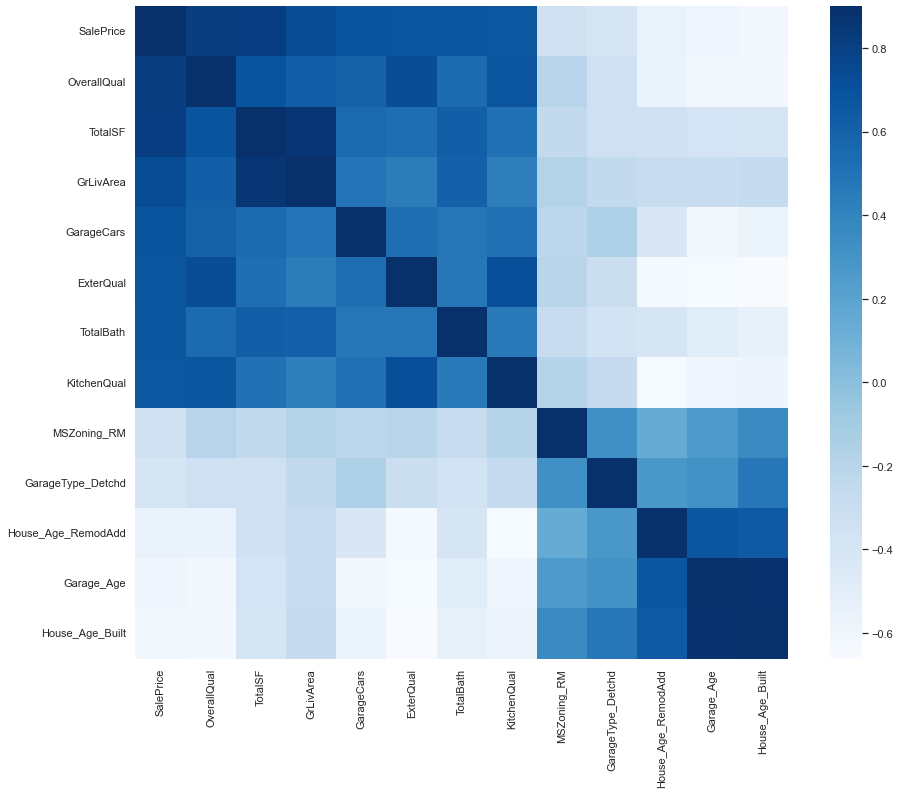

In [43]:
##correlation matrix of the top 12 most highly correlated (absolute value) variables with sales price
corr_mat_1 = corr_mat[['SalePrice', 'OverallQual', 'TotalSF', 'GrLivArea',
          'GarageCars', 'ExterQual', 'TotalBath', 'KitchenQual', 'MSZoning_RM'
          , 'GarageType_Detchd', 'House_Age_RemodAdd', 'Garage_Age', 'House_Age_Built']]
#corr_mat_1.head(30)
corr_mat_1 = corr_mat_1.loc[['SalePrice', 'OverallQual', 'TotalSF', 'GrLivArea',
          'GarageCars', 'ExterQual', 'TotalBath', 'KitchenQual', 'MSZoning_RM'
          , 'GarageType_Detchd', 'House_Age_RemodAdd', 'Garage_Age', 'House_Age_Built']]
plt.subplots(figsize=(15,12))
sns.heatmap(corr_mat_1, vmax=0.9, cmap="Blues", square=True)

We notice that there is positive correlation between Quality, Total SF, Living Area, Garage.

Also, there is negative correlation with the Age of House

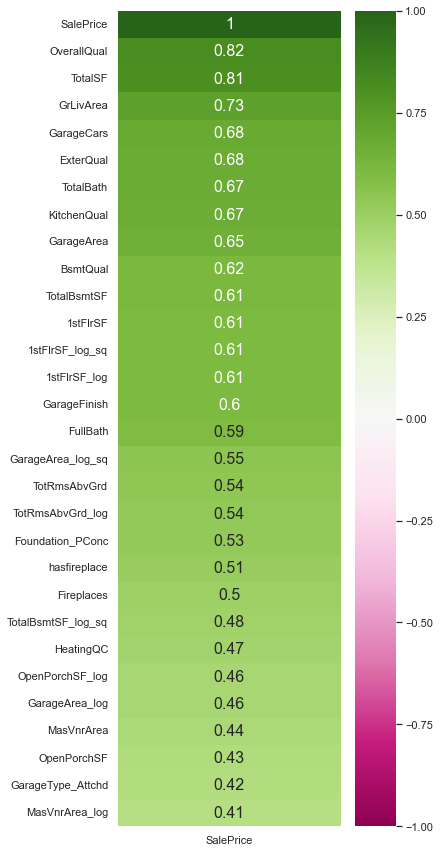

In [44]:
##visualize the correlations in a heat map
corr_new_train=df_train.corr()
plt.figure(figsize=(5,15))
sns.heatmap(corr_new_train[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(30),annot_kws={"size": 16},vmin=-1, cmap='PiYG', annot=True)
sns.set(font_scale=2)

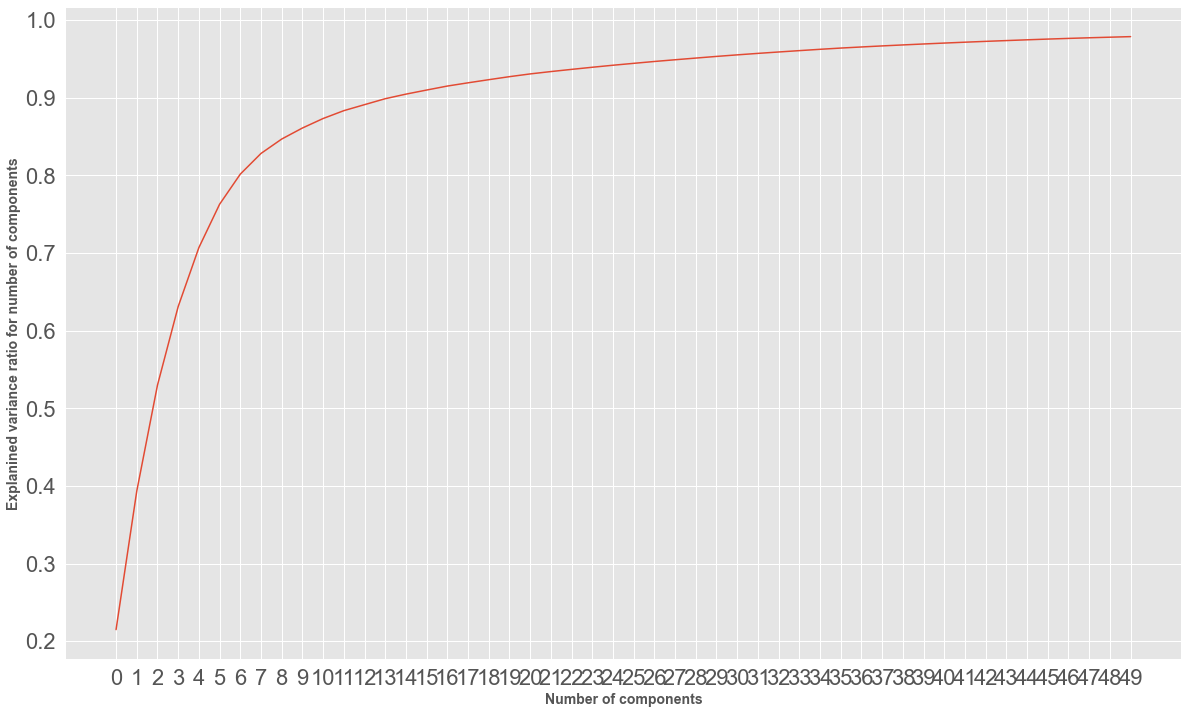

In [45]:
plt.style.use('ggplot')
plt.figure(figsize=(20,12))
rbst_scaler=RobustScaler()
train_rbst=rbst_scaler.fit_transform(df_train.drop(['SalePrice'], axis=1)) ##transforms data to quartile range

pca=PCA(50).fit(train_rbst)##train a pca model on the quartile data
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xticks(np.arange(0, 50, 1))
plt.xlabel('Number of components',fontweight='bold',size=14)
plt.ylabel('Explanined variance ratio for number of components',fontweight='bold',size=14)

train_pca=PCA(3).fit_transform(train_rbst)

Around 12 features are providing the accuracy to reach around 90%

### Model Building

In [46]:
##splitting the train data into train and test data with separate labels
target = 'SalePrice'
X = df_train.drop(target, axis=1)
y = df_train[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

print(f"X shape: {X.shape}\ny shape:{y.shape}")

std = StandardScaler() ##scaling variables to unit variance
std.fit(X_train)

X_tr = std.transform(X_train) ##fitting the normalization scaling to the train and test data 
X_te = std.transform(X_test)

X shape: (1460, 222)
y shape:(1460,)


### LassoCV
Using this regression based model which focuses on eliminating insignificant variables and see which variables are the most significant, playing well into our goal of modeling. 

In [47]:
# Setup cross validation folds
kf = KFold(n_splits=12, random_state=42, shuffle=True)

# Define error metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X_train):
    rmse = np.sqrt(-cross_val_score(model, X, y_train, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [48]:
# Create a dictionary to store the outcome of Models
model_perf = {}

Best alpha using built-in LassoCV: 0.005748
Best score using built-in LassoCV: 0.912282
Lasso picked 65 variables and eliminated the other 157 variables
Top 10 Features are ['OverallQual', 'GrLivArea', 'TotalSF', 'House_Age_Built', 'GarageCars', 'OverallCond', 'LotArea_log', 'MSZoning_C (all)', 'TotalBath', 'Neighborhood_NridgHt']
                        coef
Col_Name                    
LandContour        -0.001675
LandSlope           0.001645
Condition1          0.015296
Condition2          0.001204
OverallQual         0.077343
...                      ...
House_Age_RemodAdd -0.007541
LotArea_log         0.034765
BsmtFinSF1_log      0.016565
1stFlrSF_log        0.015661
OpenPorchSF_log     0.000041

[65 rows x 1 columns]


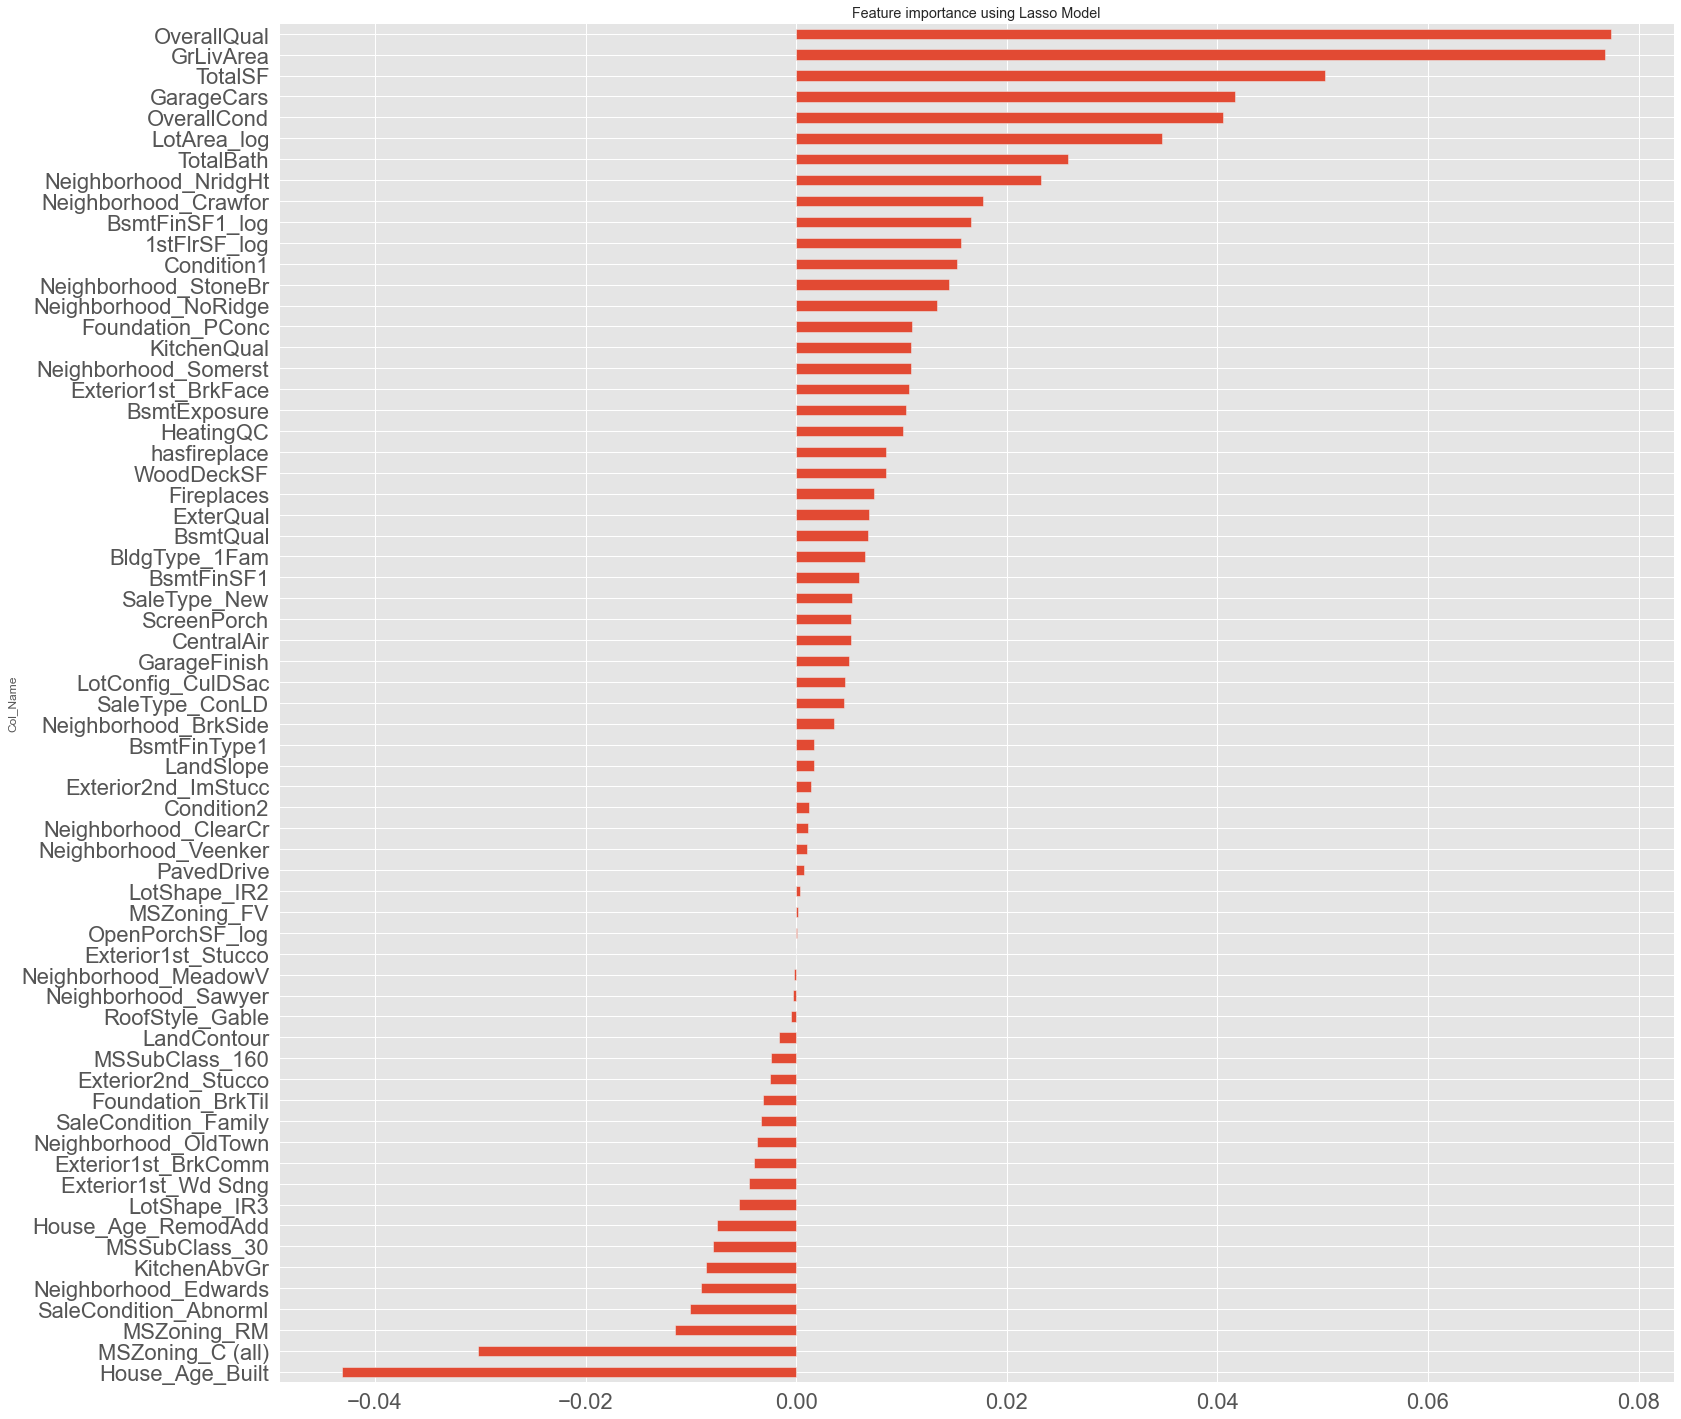

In [49]:
##run lasso cv to eliminate insignificant variables and see which variables are the most significant
def lassocv(v_eps=0):
    # Run Lasso to check for important Feature
    if v_eps != 0:
        reg = LassoCV(eps=v_eps)
    else:
        reg = LassoCV()
    reg.fit(X_tr, y_train)
    print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
    print("Best score using built-in LassoCV: %f" %reg.score(X_tr, y_train))
    coef = pd.Series(reg.coef_)
    print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " 
          +  str(sum(coef == 0)) + " variables")

    # Create a dataframe for plotting the parameters which are important as per Lasso
    coef_df = pd.DataFrame(coef)
    coef_df = coef_df.rename(columns = {0:'coef'})
    coef_df['Col_Name'] = ''
    col_list = X_train.columns.values.tolist()
    for i in range(coef_df.shape[0]):
        coef_df.at[i, "Col_Name"] = col_list[i]

    # Drop the rows having coeff values of 0
    coef_df = coef_df[coef_df['coef'] != 0.0]

    #set column as index
    coef_df = coef_df.set_index('Col_Name')

    imp_coef = coef_df['coef'].sort_values()
    if (sum(coef != 0)) < 15:
        matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
    else:
        matplotlib.rcParams['figure.figsize'] = (25.0, 25.0)
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using Lasso Model")
    
    #print("Top 10 Features are", abs(imp_coef).sort_values(ascending=False).head(10))
    print("Top 10 Features are", list(abs(imp_coef).sort_values(ascending=False).head(10).index))
    print(coef_df)
    
lassocv()


We will change the factor to lassocv to get the top feature list.

Best alpha using built-in LassoCV: 0.065780
Best score using built-in LassoCV: 0.791054
Lasso picked 8 variables and eliminated the other 214 variables
Top 10 Features are ['TotalSF', 'OverallQual', 'GarageCars', 'TotalBath', 'KitchenQual', 'House_Age_Built', 'GarageFinish', 'ExterQual']
                     coef
Col_Name                 
OverallQual      0.121558
ExterQual        0.001650
KitchenQual      0.013969
GarageFinish     0.004368
GarageCars       0.033855
TotalSF          0.125463
TotalBath        0.031568
House_Age_Built -0.008580


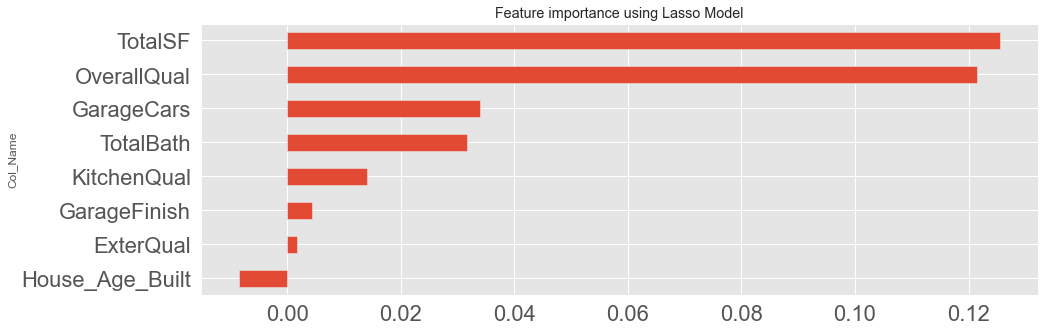

In [50]:
lassocv(2e-1)

In [51]:
##LassoCV score and RMSLE
modelo2 = LassoCV().fit(X_tr, y_train)
print("Model Score for LassCV: ", modelo2.score(X_te, y_test))
y_pred = modelo2.predict(X_te)
print("RMSLE: ", rmsle(y_test, y_pred))
model_perf['Lasso'] = (rmsle(y_test, y_pred), modelo2.score(X_te, y_test))

Model Score for LassCV:  0.920638973859111
RMSLE:  0.10856024564532367


## XGBoost Regressor

In [52]:
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

In [53]:
%%capture --no-display
modelo = xgboost.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
model_perf['XGboost'] = (rmsle(y_test, y_pred), modelo.score(X_test, y_test))

In [54]:
print("Model Score for XGBoost: ", modelo.score(X_test, y_test))
print("RMSLE: ", rmsle(y_test, y_pred))

Model Score for XGBoost:  0.8927975803102758
RMSLE:  0.126173884563421


In [55]:
##get the most important features to the xgboost model
liss = []
for col, score in zip(X_train.columns, modelo.feature_importances_):
    liss.append([col, score])
df = pd.DataFrame(liss)
df.sort_values(by=1, ascending=False)[:10]

,0,1
42,GarageFinish,0.073212
8,OverallQual,0.058669
38,KitchenQual,0.045292
188,TotalSF,0.045276
43,GarageCars,0.040314
195,House_Age_Built,0.039851
13,ExterQual,0.039674
189,TotalBath,0.039149
194,hasfireplace,0.033545
44,GarageArea,0.028338


### Gradient Boosting Regressor

In [56]:
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  


In [57]:
##gradient boosting regressor score
modelogbr = gbr.fit(X_train, y_train)
print("Model Score for Gradient Bossting: ", modelogbr.score(X_test, y_test))
y_pred = modelogbr.predict(X_test)
print("RMSLE: ", rmsle(y_test, y_pred))
model_perf['Gradientboost'] = (rmsle(y_test, y_pred), modelogbr.score(X_test, y_test))

Model Score for Gradient Bossting:  0.9303204398667406
RMSLE:  0.10172316874037304


In [58]:
##gradient boosting regressor most important features
gbrliss = []
for col, score in zip(X_train.columns, modelogbr.feature_importances_):
    gbrliss.append([col, score])
df_gbr = pd.DataFrame(gbrliss)
df_gbr.sort_values(by=1, ascending=False)[:10]

,0,1
8,OverallQual,0.106541
188,TotalSF,0.078448
31,GrLivArea,0.062043
13,ExterQual,0.054407
189,TotalBath,0.038304
15,BsmtQual,0.032399
38,KitchenQual,0.032013
209,GarageArea_log,0.031121
195,House_Age_Built,0.030793
204,TotalBsmtSF_log,0.024962


### Random Forest Regressor

In [59]:
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

In [60]:
##random forest score
modelorf = rf.fit(X_train, y_train)
print("Model Score for RandomForest: ", modelorf.score(X_test, y_test))
y_pred = modelorf.predict(X_test)
print("RMSLE: ", rmsle(y_test, y_pred))
model_perf['RandomForest'] = (rmsle(y_test, y_pred), modelorf.score(X_test, y_test))

Model Score for RandomForest:  0.8862064901804536
RMSLE:  0.1299947839304483


In [61]:
##random forest most important features
rfliss = []
for col, score in zip(X_train.columns, modelorf.feature_importances_):
    rfliss.append([col, score])
df_gbr = pd.DataFrame(rfliss)
df_gbr.sort_values(by=1, ascending=False)[:10]

,0,1
8,OverallQual,0.480889
188,TotalSF,0.317975
26,CentralAir,0.015600
43,GarageCars,0.013454
31,GrLivArea,0.012010
9,OverallCond,0.011300
189,TotalBath,0.010274
195,House_Age_Built,0.009002
196,House_Age_RemodAdd,0.008346
19,BsmtFinSF1,0.005555


The top 10 features of gradient boosting model

In [62]:
##top 10 most important variables again
df_gbr.sort_values(by=1, ascending=False)[:10]

,0,1
8,OverallQual,0.480889
188,TotalSF,0.317975
26,CentralAir,0.015600
43,GarageCars,0.013454
31,GrLivArea,0.012010
9,OverallCond,0.011300
189,TotalBath,0.010274
195,House_Age_Built,0.009002
196,House_Age_RemodAdd,0.008346
19,BsmtFinSF1,0.005555


#### Stacked Modeling
We will create the mixed bag of the previous models created and assign weights to them to check if the performance improves. This will avoid overfitting.

In [63]:
%%capture --no-display
stacking = StackingCVRegressor(regressors=(xgboost, gbr, rf),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)
stacking_model = stacking.fit(np.array(X_train), np.array(y_train))

In [64]:
print("Model Score for StackedModel: ",stacking_model.score(np.array(X_test), np.array(y_test)))
y_pred = stacking_model.predict(np.array(X_test))
print("RMSLE: ", rmsle(y_test, y_pred))
model_perf['Stack'] = (rmsle(y_test, y_pred), stacking_model.score(np.array(X_test), np.array(y_test)))

Model Score for StackedModel:  0.9199432842247648
RMSLE:  0.10903503439753374


In [65]:
# Mix models in order to make the final predictions more robust to overfitting
def predict_score(X):
    return (
            (0.3 * modelogbr.predict(X)) + \
            (0.3 * modelo.predict(X)) + \
            (0.05 * modelorf.predict(X)) + \
            (0.35 * stacking_model.predict(np.array(X)))
        )

# Get final precitions from the blended model
mix_score = rmsle(y_test, predict_score(X_test))
print('RMSLE score on train data:')
print(mix_score)

RMSLE score on train data:
0.10912482729449022


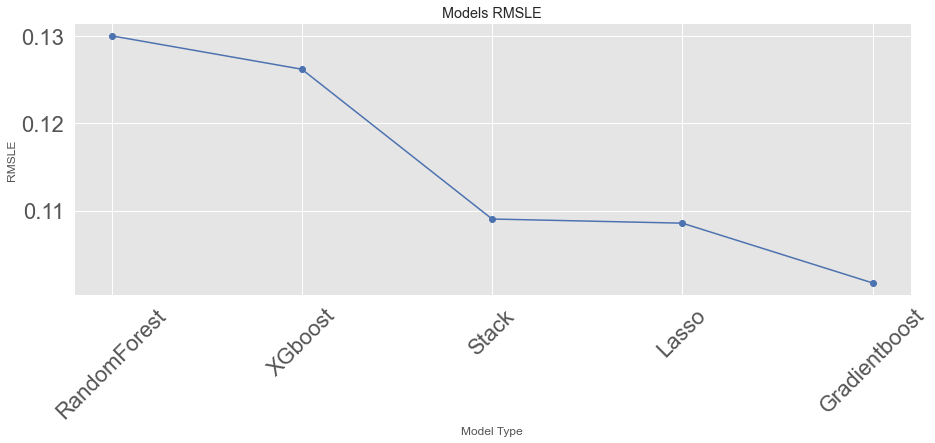

In [66]:
# Sort the Models based on RMSLE score and plot them
sort_models_rmsle = []
sort_models_type = []
model_type = []
model_rmsle = []
for x in model_perf:
    sort_models_rmsle.append(model_perf[x][0])
    model_rmsle.append(model_perf[x][0])
    model_type.append(x)

# Loop through the list and order it by least to max
sort_models_rmsle.sort(reverse=True)
[sort_models_type.append(model_type[model_rmsle.index(sort_models_rmsle[x])]) for x in range(len(sort_models_rmsle))]
    
x = sort_models_type
y = sort_models_rmsle

plt.figure(figsize = (15,5)) 
plt.xticks(rotation=45)
plt.title('Models RMSLE')
plt.xlabel('Model Type')
plt.ylabel('RMSLE')
plt.plot(x, y, linestyle='-', marker='o', color='b')
plt.show()

### Summary
As we notice from the plot, the Gradient boost model provides a better performance. The lower the RMSLE score, the better is the model for our case, because we want the error to be lower.
The Lasso model provides us with the top important feature list.

Hence, if someone wants to impove their selling price of the house in Ames, Iowa, they have a better prospect of a higher value if they spend in making enhancement to the following features:

###### Additional Criteria: 
House age

Overall quality

The Age of House and Overall Quality have an impact to the housing price, but we cant change the age of an house and also, mentioning that the Overall Quality needs to be improved is pretty vague. Hence, concentrating on the following list of specs, would be a better option to increase the price of a property.

###### Main House Interior
Number of bathrooms

Kitchen Quality

Total Square Footage

Above Ground Living Area

Basement Quality
###### Garage Spec
Garage Area
###### Exterior
Exterior quality

    